In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
material= "/gate/geometry/setMaterialDatabase ../data/GateMaterials.db \n"

world=  """
/gate/world/geometry/setXLength 2. m 
/gate/world/geometry/setYLength 2. m 
/gate/world/geometry/setZLength 2. m 
/gate/world/setMaterial Air 
/gate/world/vis/setVisible 0 \n"""

detector="""
/gate/world/daughters/name CTscanner 
/gate/world/daughters/insert box 
/gate/CTscanner/setMaterial Tungsten 
/gate/CTscanner/geometry/setXLength 25 mm 
/gate/CTscanner/geometry/setYLength 25 mm 
/gate/CTscanner/geometry/setZLength 5 mm 
/gate/CTscanner/vis/forceSolid 
/gate/CTscanner/vis/setColor yellow 
/gate/CTscanner/placement/setTranslation 0. 0. 5. cm \n"""


phatom_pt1= """
/gate/world/daughters/name Phantom
/gate/world/daughters/insert cylinder
/gate/Phantom/placement/setTranslation 0.0 0.0 0.0 cm 
/gate/Phantom/setMaterial PMMA
/gate/Phantom/geometry/setRmax 6 mm
/gate/Phantom/geometry/setRmin 0 mm
/gate/Phantom/geometry/setHeight 10 mm
/gate/Phantom/vis/forceWireframe
/gate/Phantom/vis/setColor red
/gate/Phantom/vis/setVisible 1 \n
"""
#Aqui deben ser las rotaciones

Cristales="""
/gate/Phantom/daughters/name Micro1
/gate/Phantom/daughters/insert sphere
/gate/Micro1/setMaterial HA
/gate/Micro1/geometry/setRmax 0.3 mm
/gate/Micro1/geometry/setRmin 0 mm
/gate/Micro1/vis/forceSolid
/gate/Micro1/vis/setColor blue
/gate/Micro1/vis/setVisible 1
/gate/Micro1/repeaters/insert linear
/gate/Micro1/linear/setRepeatNumber  5
/gate/Micro1/linear/setRepeatVector  0.  1.5 0. mm
/gate/Micro1/placement/setTranslation 3.5 0.0 -1. mm

/gate/Phantom/daughters/name Micro2
/gate/Phantom/daughters/insert sphere
/gate/Micro2/setMaterial HA
/gate/Micro2/geometry/setRmax 0.6 mm
/gate/Micro2/geometry/setRmin 0 mm
/gate/Micro2/vis/forceSolid
/gate/Micro2/vis/setColor blue
/gate/Micro2/vis/setVisible 1
/gate/Micro2/repeaters/insert linear
/gate/Micro2/linear/setRepeatNumber  5
/gate/Micro2/linear/setRepeatVector  0.  1.5 0. mm
/gate/Micro2/placement/setTranslation 2.5 0.0 -3. mm

/gate/Phantom/daughters/name Al203
/gate/Phantom/daughters/insert sphere
/gate/Al203/setMaterial OX
/gate/Al203/geometry/setRmax 0.3 mm
/gate/Al203/geometry/setRmin 0 mm
/gate/Al203/vis/forceSolid
/gate/Al203/vis/setColor yellow
/gate/Al203/vis/setVisible 1
/gate/Al203/repeaters/insert linear
/gate/Al203/linear/setRepeatNumber  5
/gate/Al203/linear/setRepeatVector  0.  1.5 0. mm
/gate/Al203/placement/setTranslation -3.5 0.5 0. mm

/gate/Phantom/daughters/name Al204
/gate/Phantom/daughters/insert sphere
/gate/Al204/setMaterial OX
/gate/Al204/geometry/setRmax 0.6 mm
/gate/Al204/geometry/setRmin 0 mm
/gate/Al204/vis/forceSolid
/gate/Al204/vis/setColor yellow
/gate/Al204/vis/setVisible 1
/gate/Al204/repeaters/insert linear
/gate/Al204/linear/setRepeatNumber  5
/gate/Al204/linear/setRepeatVector  0.  1.5 0. mm
/gate/Al204/placement/setTranslation -2.5 0.5 -3. mm \n """

physi="""
/gate/physics/addPhysicsList emstandard_opt4 \n
"""
Digi_pt1= """
/gate/actor/addActor DoseActor     MyActor \n
"""

Digi_pt2="""
/gate/actor/MyActor/attachTo                    CTscanner 
/gate/actor/MyActor/setResolution               256 256 1 
/gate/actor/MyActor/stepHitType                 post \n
"""

verbose="""
/control/verbose 0 
/run/verbose 0 
/run/particle/verbose 0 
/event/verbose 0 
/tracking/verbose 0 
/tracking/verbose 0 
/gate/generator/verbose 0 
/gate/source/verbose 0 
/run/particle/verbose 0 \n
"""
init= """/gate/run/initialize
/gate/random/setEngineName MersenneTwister
/gate/random/setEngineSeed auto
"""

source="""
/gate/source/addSource electron_beam gps
/gate/source/electron_beam/gps/particle gamma 
/gate/source/electron_beam/gps/ene/type Gauss 
/gate/source/electron_beam/gps/ene/mono 0.02 MeV 
/gate/source/electron_beam/gps/ene/sigma 0.00216 MeV 
/gate/source/electron_beam/gps/centre 0 0 -23 cm 
/gate/source/electron_beam/gps/angtype iso 
/gate/source/electron_beam/gps/mintheta 0 deg 
/gate/source/electron_beam/gps/maxtheta 0 deg 
/gate/source/electron_beam/gps/minphi 0 deg 
/gate/source/electron_beam/gps/maxphi 0 deg 
/gate/source/electron_beam/gps/type Plane 
/gate/source/electron_beam/gps/shape Square
/gate/source/electron_beam/gps/halfx 15 mm
/gate/source/electron_beam/gps/halfy 15 mm
"""

adquisition="""
/gate/application/setTotalNumberOfPrimaries 1e8 
/gate/application/start \n
"""

In [41]:
Num_proyec=30 #Numero de proyecciones que se usaran
Num_Angulos=Num_proyec+2
Angulos= np.linspace(-10,10,Num_Angulos) #lo normal es que sea entre -10 y 10 grados
Angulos= np.append(Angulos,0)
Num_Angulos=Num_Angulos +1
print(Angulos)

[-10.          -9.35483871  -8.70967742  -8.06451613  -7.41935484
  -6.77419355  -6.12903226  -5.48387097  -4.83870968  -4.19354839
  -3.5483871   -2.90322581  -2.25806452  -1.61290323  -0.96774194
  -0.32258065   0.32258065   0.96774194   1.61290323   2.25806452
   2.90322581   3.5483871    4.19354839   4.83870968   5.48387097
   6.12903226   6.77419355   7.41935484   8.06451613   8.70967742
   9.35483871  10.           0.        ]


In [23]:
for i in range(2):
    f = open('Base.mac', "w")            
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom_pt1) #Se crea el phantoma

    #Aqui van las rotaciones
    #Final de las rotaciones


    #f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor

    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFileBase.mhd \n" ) 
    #Final de los nombres

    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(source) #agregar fuente
    f.write(adquisition) #empezar simulación

In [32]:
names=[]
exce=[]
exce.append('#!/bin/bash')
#exce.append('Gate Base.mac')

for i in range(Num_Angulos):
    f = open('main%d.mac' %i, "w")
    names.append('main%d.mac' %i)
    exce.append('Gate'+' '+'main%d.mac' %i)             
    f.write(material) #directorio de materiales
    f.write(world) #Se crea el world
    f.write(detector) #Se crea el detector
    f.write(phatom_pt1) #Se crea el phantoma
    
    #Aqui van las rotaciones
    f.write("/gate/Phantom/placement/setRotationAxis 0 1 0 \n" )
    f.write("/gate/Phantom/placement/setRotationAngle %f deg \n " %Angulos[i] )
    #Final de las rotaciones
    
    f.write(Cristales) #Se insertan los cristales
    f.write(physi) #Cargamos las fisicas
    f.write(Digi_pt1) #Parte 1 del actor
    
    #Nombres diferentes para las salidas
    f.write("/gate/actor/MyActor/save                        MyOutputFile%d.mhd \n" %i ) 
    #FInal de los nombres
    
    f.write(Digi_pt2) #parte 2 del actor
    f.write(verbose) #cargamos verbose
    f.write(init) #inicializamos
    f.write(source) #agregar fuente
    f.write(adquisition) #empezar simulación

In [33]:
print(names[-1])

main32.mac


In [ ]:
#!rm main101.mac

In [34]:
fg = open('gates.sh' , "w")
for i in exce:
    fg.write(i)
    fg.write("\n")

In [35]:
#Es necesario correr dos veces
fg = open('gates.sh' , "w")
for i in exce:
    fg.write(i)
    fg.write("\n")

In [36]:
!chmod u+x gates.sh

In [37]:
!bash gates.sh

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-06-patch-01    (14-February-2020)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.0 (March 2020)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollabor


hIoni:  for proton  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=    2 MeV  deltaVI
          BetheBloch : Emin=    2 MeV Emax=  100 TeV  deltaVI

hBrems:  for proton  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               hBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

hPairProd:  for proton  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      Sampling table 17x1001; from 7.50


muIoni:  for mu+  SubType=2
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      StepFunction=(0.1, 0.02 mm), integ: 1, fluct: 1, linLossLim= 0.01
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
               Bragg : Emin=    0 eV  Emax=  200 keV  deltaVI
          BetheBloch : Emin=  200 keV Emax=    1 GeV  deltaVI
        MuBetheBloch : Emin=    1 GeV Emax=  100 TeV

muBrems:  for mu+  SubType=3
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
              MuBrem : Emin=    0 eV  Emax=  100 TeV
      ===== Limit on energy threshold has been applied 

muPairProd:  for mu+  SubType=4
      dE/dx and range tables from 100 eV  to 100 TeV in 240 bins
      Lambda tables from threshold to 100 TeV, 20 bins/decade, sp

In [33]:
del names
del exce
del f
del fg
del world,detector,phatom_pt1,Cristales,physi,Digi_pt1,Digi_pt2,verbose,init,source,adquisition

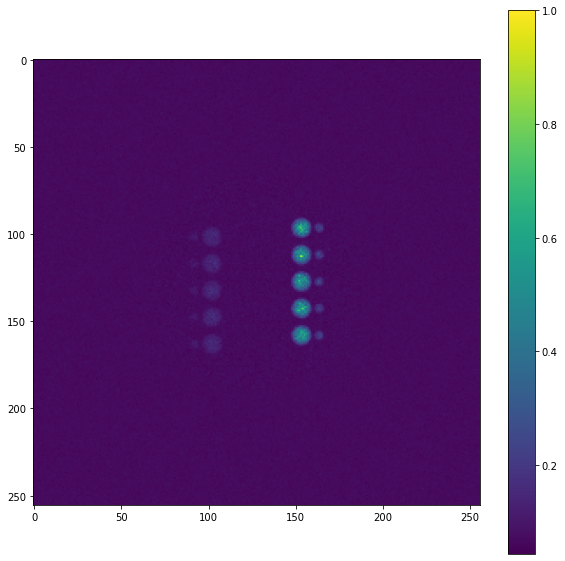

In [3]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile15-Dose.mhd', sitk.sitkFloat32))
#imagen_GATE_dosis = ct_scans[0]+0.00000000001
imagen_GATE_dosis = ct_scans[0]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]

imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
#imagen_GATE_dosis= imagen_GATE_dosisBase
#imagen_GATE_dosis= imagen_GATE_dosis<1

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosis,cmap='viridis')
plt.colorbar()

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "MyOutputFile32-Dose.mhd" does not exist.

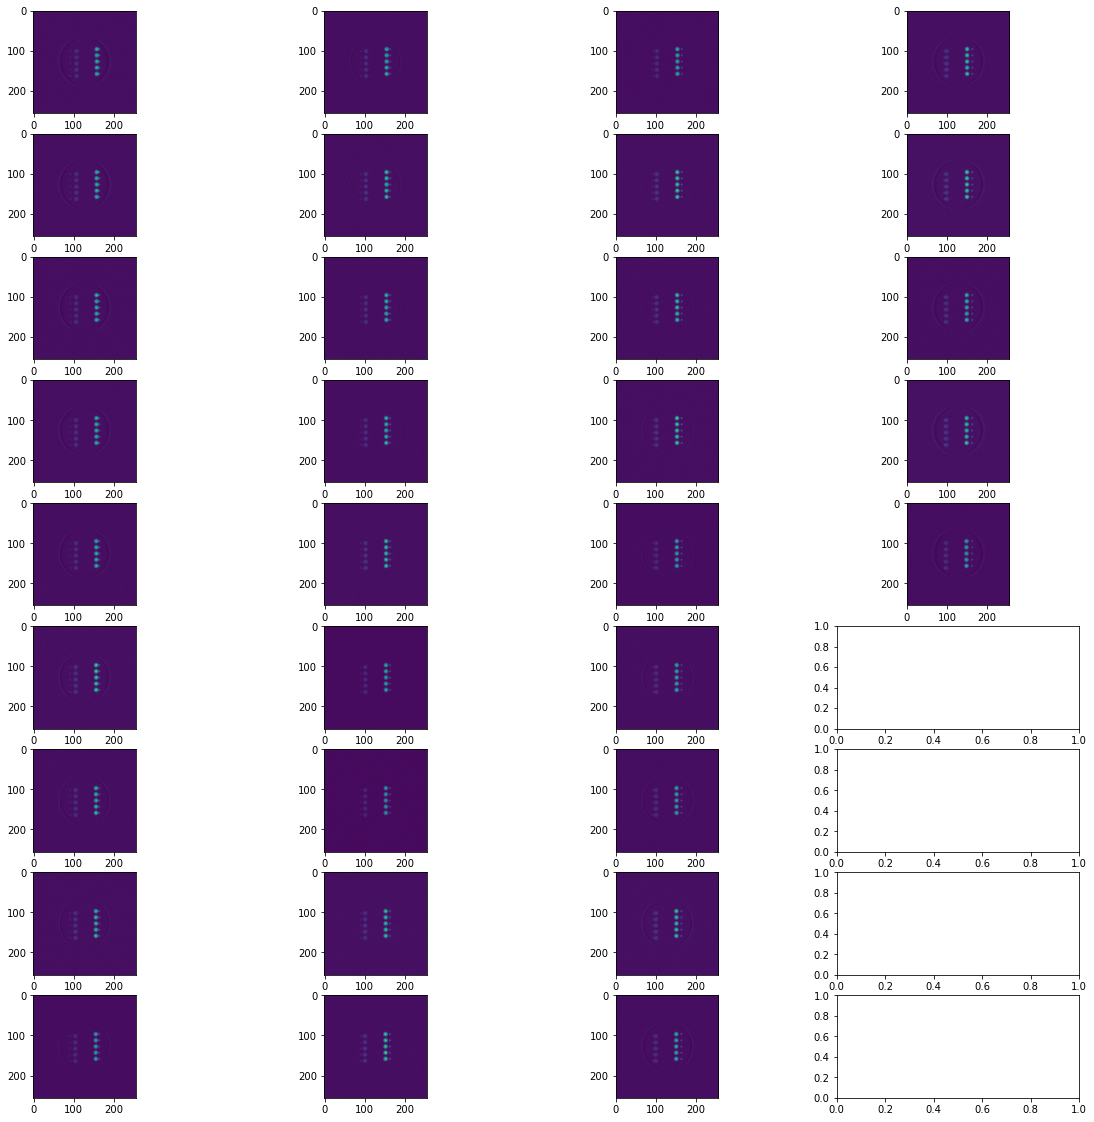

In [61]:
fig, ax = plt.subplots(9,4, figsize=(20,20))
i=0
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]
#for i in range(Num_proyec-1):
for j in range(4):
    for k in range(9):
        ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile%d-Dose.mhd' %i , sitk.sitkFloat32))
        imagen_GATE_dosis = ct_scans[0]
        #imagen_GATE_dosis = ct_scans[0]+0.00000000001
        
        imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
        imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
        df = pd.DataFrame(data=imagen_GATE_dosis.astype(float))
        df.to_csv('outfile%d.txt' %i, sep=',', header=False,float_format='%.2f',  index=False)
        ax[k,j].imshow(imagen_GATE_dosis,cmap='viridis')
        i=i+1
        #print(i)
    #plt.colorbar()

plt.savefig('proyecciones5.jpg')
plt.show()

In [62]:
data = pd.read_csv('outfile0.txt',sep=',',header=None)
data = pd.DataFrame(data)

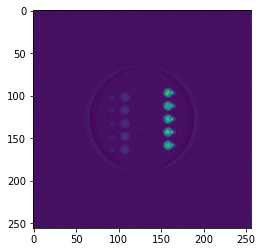

In [63]:
 plt.imshow(data,cmap='viridis')

In [29]:
from skimage.transform import radon, iradon

tamano_rodaja = 1 # en pixeles
tamano_detector = 256 # en pixeles
max_ind = int((tamano_detector/tamano_rodaja) - 1) # Numero de rodajas (enteras)
numero_imagenes = Num_proyec

IMGs = []

for i in range(numero_imagenes):
    #IMG = np.genfromtxt('outfile%d.txt' %i)
    IMG = pd.read_csv('outfile%d.txt' %i,sep=',',header=None)
    IMG = pd.DataFrame(IMG)
    #print(IMG)
    IMGs.append(IMG)

IMGs = np.array(IMGs)


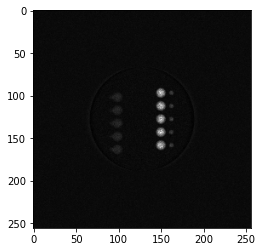

In [30]:
plt.imshow(IMGs[25], cmap="gray")
#plt.colorbar()
plt.show()

In [31]:
sinograms = []

for ind in range(max_ind):
    projections = []
    for im in IMGs:
        rodaja = np.sum(im[tamano_rodaja*ind:tamano_rodaja*(ind+1), :], axis=0)
        projections.append(rodaja)
    
    projections = np.array(projections)
    sinograms.append(np.transpose(projections))

sinograms = np.array(sinograms)

del projections

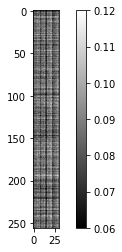

In [32]:
plt.imshow(sinograms[0],cmap="gray")
plt.colorbar()

In [42]:
print(len(sinograms))
print(len(Angulos))
Angulos= np.delete(Angulos,-1)
Angulos= np.delete(Angulos,-1)

255
33


6.517336261743588e-05


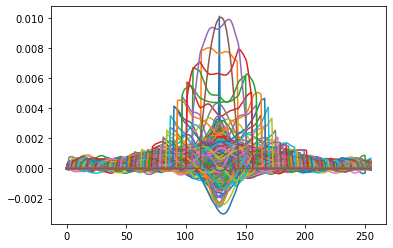

In [43]:
Angulos= np.delete(Angulos,-1)
theta= Angulos
reconstruction_fbp= iradon(sinograms[0],theta=theta,filter_name='hann')
print(max(reconstruction_fbp[0]))
plt.plot(reconstruction_fbp)
plt.show()

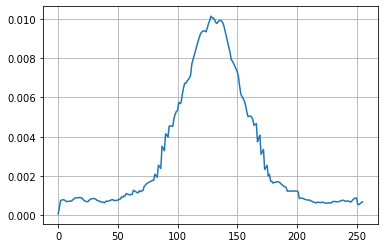

In [44]:
k=[]
for i in reconstruction_fbp:
    k.append(max(i))
plt.plot(k)
plt.grid()

In [59]:
#theta = np.linspace(0.0, 208.8, numero_imagenes, endpoint=False)
theta= Angulos
rodajas = []

for ind, sinogram in enumerate(sinograms):
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='hann')
    plt.imshow(reconstruction_fbp, cmap="gray", vmin=0.02, vmax=0.04)
    plt.colorbar()
    plt.savefig("rodaja_{}.png".format(ind))
    plt.clf()
    
    indx_sup = np.where(reconstruction_fbp >= 0.01)
    indx_inf = np.where(reconstruction_fbp <= 0.007)
    reconstruction_fbp[indx_sup[0], indx_sup[1]] = 0.01
    reconstruction_fbp[indx_inf[0], indx_inf[1]] = 0.007
    rodajas.append(reconstruction_fbp)

<Figure size 432x288 with 0 Axes>

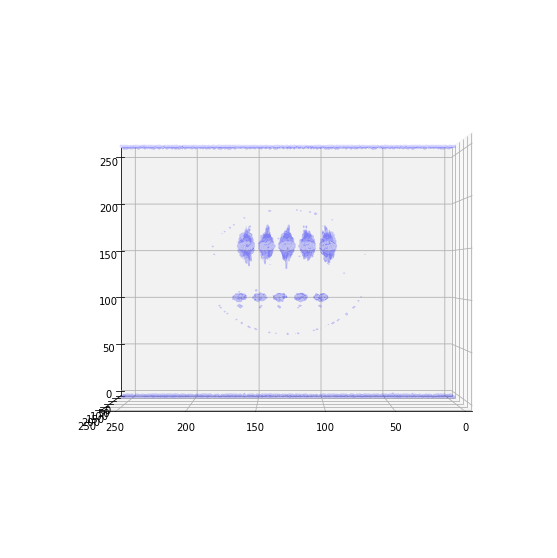

In [60]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
%matplotlib inline

def plot_3d(image, threshold=0.0071): 
    verts, faces, normals, values = measure.marching_cubes(image, level=threshold , method='lewiner')
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.2) #alpha =0.1
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, 256)
    ax.set_ylim(0, 256)
    ax.set_zlim(0, 255)
    ax.view_init(0,90) # (polar, azimutal) 
    plt.show()

rodajas = np.array(rodajas)
plot_3d(rodajas)